# 1. 

In [1]:
import numpy as np
a = np.random.rand(10, 3)
print (a, '\n')
print (a[np.arange(10), np.argmin(abs(a - 0.5), axis = 1)])

[[0.26366399 0.65345419 0.46320598]
 [0.36785742 0.53104759 0.57996176]
 [0.46865769 0.98787673 0.34132397]
 [0.41939642 0.63500714 0.73381482]
 [0.01215796 0.56889321 0.51300673]
 [0.0585302  0.35935727 0.31978544]
 [0.92471491 0.47502983 0.24253222]
 [0.09283203 0.80617142 0.95541716]
 [0.44588159 0.66342288 0.44651696]
 [0.03569869 0.61458229 0.65330761]] 

[0.46320598 0.53104759 0.46865769 0.41939642 0.51300673 0.35935727
 0.47502983 0.80617142 0.44651696 0.61458229]


# 2. 

In [2]:
import numpy as np
a = np.random.rand(6,6)
print (a, '\n')
print (np.sum(a, axis = 1) / np.min(a, axis = 0))

[[0.83631662 0.82285097 0.16421638 0.35349971 0.16366152 0.33768878]
 [0.07711174 0.53131801 0.04386434 0.42067098 0.26155768 0.26709714]
 [0.12764516 0.37806351 0.01860242 0.86670374 0.32941578 0.8481734 ]
 [0.17965225 0.35419911 0.72744003 0.3440897  0.57093516 0.27459449]
 [0.28409214 0.78752696 0.61723598 0.48082821 0.0158436  0.13783092]
 [0.77320082 0.69268544 0.45834519 0.39072818 0.9275061  0.37494011]] 

[ 34.73185765   4.52180661 138.07902738   7.12288316 146.64332821
  26.24524213]


# 3. 

In [3]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print (np.max(x[1:][(x == 0)[:-1]]))

5


# 4. 

In [4]:
import numpy as np
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print (x + np.bincount(i, minlength = len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


# k-means. 

In [19]:
import numpy as np

In [20]:
import matplotlib.pyplot as plt

In [21]:
import numpy.random 
from scipy.spatial import distance

In [22]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:5] #CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)

array([['0001', 'Male', '19', '15', '39'],
       ['0002', 'Male', '21', '15', '81'],
       ['0003', 'Female', '20', '16', '6'],
       ['0004', 'Female', '23', '16', '77'],
       ['0005', 'Female', '31', '17', '40']], dtype=object)

In [23]:
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
data[:5]

array([[ 1.,  1., 19., 15., 39.],
       [ 2.,  1., 21., 15., 81.],
       [ 3.,  0., 20., 16.,  6.],
       [ 4.,  0., 23., 16., 77.],
       [ 5.,  0., 31., 17., 40.]])

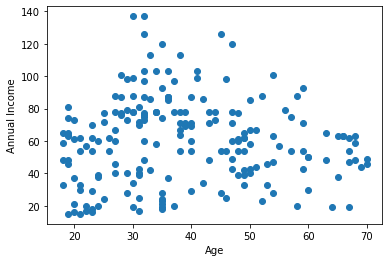

In [24]:
plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

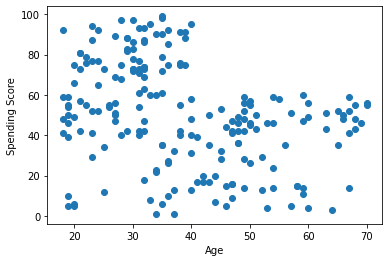

In [25]:
plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

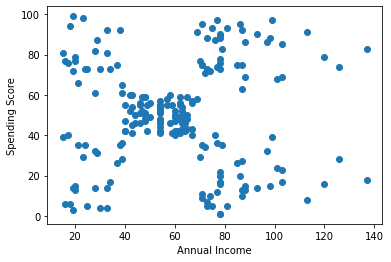

In [52]:
plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [27]:
def standardization(data):   # data is 2D-array
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    return (data - mean)/std

standardized = standardization(data[:,2:])
print(standardized[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [28]:
def re_evaluate (obs, code_book):
    new_code_book = np.empty((len(code_book),len(code_book[0])))
    distortion = distance.cdist(obs, code_book, 'sqeuclidean')
    temp = np.hstack((obs, distortion.argmin(axis=1).reshape(len(distortion),1)))
    for i in range(len(code_book)):
        new_code_book[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]
        
    return new_code_book 

In [31]:
def kmeans(obs, k_or_guess, iter=20, thresh=1e-05): #k_or_guess has int or ndarray type
    if type(k_or_guess) == int:
        code_book = obs[np.random.choice(range(len(obs)), k_or_guess, False)]
    else:
        code_book = k_or_guess
    prev_distortion = -1
    cur_distortion = distance.cdist(obs, code_book, 'sqeuclidean').min(axis = 1).sum()
    
    while abs(cur_distortion - prev_distortion) > thresh:
        code_book = re_evaluate (obs, code_book)
        prev_distortion = cur_distortion
        cur_distortion = distance.cdist(obs, code_book, 'sqeuclidean').min(axis = 1).sum()
        
    return code_book, cur_distortion 

In [32]:
codebook, distor = kmeans(standardized[:,[1,2]], 5)

<ipython-input-28-04cf7b33d8dc>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_code_book[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]


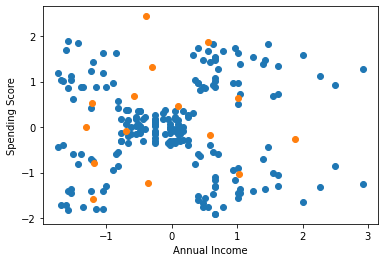

In [50]:
plt.scatter(standardized[:, 1], standardized[:, 2])
plt.scatter(codebook[:,0],codebook[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

<ipython-input-28-04cf7b33d8dc>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_code_book[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]


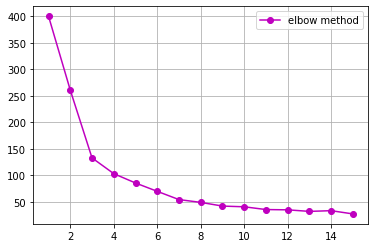

In [48]:
dist_k = np.empty(15)
for i in range(1,16):
    codebook, distor = kmeans(standardized[:,[0,1]], i)
    dist_k[i-1] = distor
plt.plot(range(1,16), dist_k, 'o-r', c = 'm', label = "elbow method")
plt.legend()
plt.grid(True)

<ipython-input-28-04cf7b33d8dc>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_code_book[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]
<ipython-input-58-ddad485dcc22>:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block1 = np.vstack(row for row in matrix if row[-1] == 0)
<ipython-input-58-ddad485dcc22>:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block3 = np.vstack(row for row in matrix if row[-1] == 2)


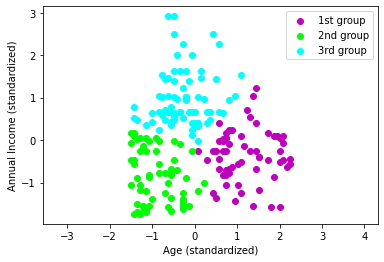

In [58]:
codebook, distor = kmeans(standardized[:,[0,1]], 3)

distortion = distance.cdist(standardized[:,[0,1]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[0,1]], distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)

plt.scatter(block1[:,0], block1[:,1], c='m', label='1st group')
plt.scatter(block2[:,0], block2[:,1], c='lime', label='2nd group')
plt.scatter(block3[:,0], block3[:,1], c='aqua', label='3rd group')
plt.axis('equal')
plt.xlabel("Age (standardized)")
plt.ylabel('Annual Income (standardized)')
plt.legend()
plt.show()

<ipython-input-28-04cf7b33d8dc>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_code_book[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]


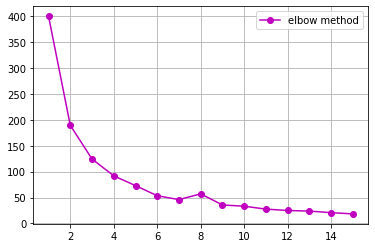

In [45]:
#метод локтя
dist_k = np.empty(15)
for i in range(1,16):
    codebook, distor = kmeans(standardized[:,[0,2]], i)
    dist_k[i-1] = distor
plt.plot(range(1,16), dist_k, 'o-r', c = 'm', label = "elbow method")
plt.legend()
plt.grid(True)

<ipython-input-28-04cf7b33d8dc>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_code_book[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]
<ipython-input-57-b05e57f59818>:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block1 = np.vstack(row for row in matrix if row[-1] == 0)
<ipython-input-57-b05e57f59818>:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block3 = np.vstack(row for row in matrix if row[-1] == 2)
<ipython-input-57-b05e57f59818>:8: FutureWarnin

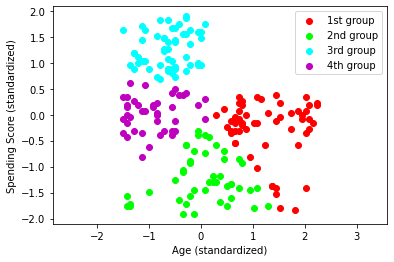

In [57]:
codebook, distor = kmeans(standardized[:,[0,2]], 4)

distortion = distance.cdist(standardized[:,[0,2]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[0,2]], distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)
block4 = np.vstack(row for row in matrix if row[-1] == 3)


plt.scatter(block1[:,0], block1[:,1], c='r', label='1st group')
plt.scatter(block2[:,0], block2[:,1], c='lime', label='2nd group')
plt.scatter(block3[:,0], block3[:,1], c='aqua', label='3rd group')
plt.scatter(block4[:,0], block4[:,1], c='m', label='4th group')

plt.axis('equal')
plt.xlabel("Age (standardized)")
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.show()

<ipython-input-28-04cf7b33d8dc>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  new_code_book[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]
<ipython-input-56-5cdc2ee1f8cf>:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block1 = np.vstack(row for row in matrix if row[-1] == 0)
<ipython-input-56-5cdc2ee1f8cf>:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  block3 = np.vstack(row for row in matrix if row[-1] == 2)
<ipython-input-56-5cdc2ee1f8cf>:8: FutureWarnin

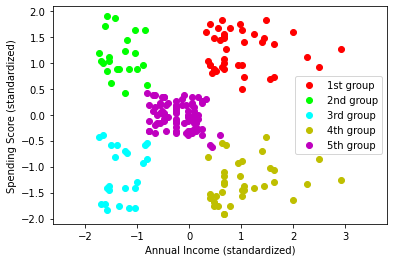

In [56]:
codebook, distor = kmeans(standardized[:,[1,2]], 5)

distortion = distance.cdist(standardized[:,[1,2]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[1,2]], distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)
block4 = np.vstack(row for row in matrix if row[-1] == 3)
block5 = np.vstack(row for row in matrix if row[-1] == 4)
#block6 = np.vstack(row for row in matrix if row[-1] == 5)


plt.scatter(block1[:,0], block1[:,1], c='r', label='1st group')
plt.scatter(block2[:,0], block2[:,1], c='lime', label='2nd group')
plt.scatter(block3[:,0], block3[:,1], c='aqua', label='3rd group')
plt.scatter(block4[:,0], block4[:,1], c='y', label='4th group')
plt.scatter(block5[:,0], block5[:,1], c='m', label='5th group')
#plt.scatter(block6[:,0], block6[:,1], c='m', label='6th group')


plt.axis('equal')
plt.xlabel("Annual Income (standardized)")
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.show()